In [16]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

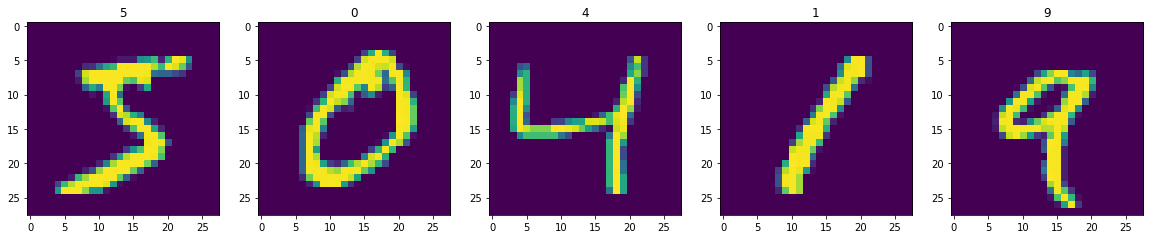

In [10]:
# Load and normalize data
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Plot some examples
N_PLOT = 5
fig, ax = plt.subplots(ncols=N_PLOT, figsize=(4*N_PLOT, 4))
for i in range(N_PLOT):
    ax[i].imshow(x_train[i])
    ax[i].set_title(str(y_train[i]))
plt.show()

In [11]:
# Construct model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Train and evaluate model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)
loss, accuracy = model.evaluate(x_test, y_test)

Epoch 1/5
60000/60000 [==============================] - 6s 104us/step - loss: 0.2208 - acc: 0.9352
Epoch 2/5
60000/60000 [==============================] - 6s 106us/step - loss: 0.0959 - acc: 0.9704
Epoch 3/5
60000/60000 [==============================] - 6s 102us/step - loss: 0.0685 - acc: 0.9787
Epoch 4/5
60000/60000 [==============================] - 6s 100us/step - loss: 0.0528 - acc: 0.9827
Epoch 5/5
10000/10000 [==============================] - 0s 26us/step


[0.05968782628481276, 0.9817]

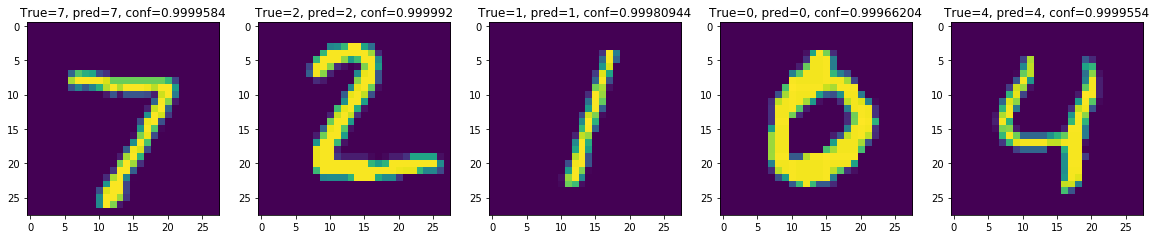

In [19]:
# Example predictions
# Plot some examples
N_EXAMPLE = 5
pred = model.predict(x_test[:N_EXAMPLE])
pred_conf = np.max(pred,axis=1)
pred_ans  = np.argmax(pred,axis=1)

fig, ax = plt.subplots(ncols=N_PLOT, figsize=(4*N_PLOT, 4))
for i in range(N_PLOT):
    ax[i].imshow(x_test[i])
    ax[i].set_title("True="+str(y_test[i])+", pred="+str(pred_ans[i])+", conf="+str(pred_conf[i]))
plt.show()